In [6]:
#import libraries

In [7]:
import pandas as pd
import numpy as np

In [8]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [9]:
#reading dataset

In [10]:
df = pd.read_excel('/content/Obseity data - cohort 98-06-20.xlsx')

In [11]:
# separate categorical and numerical columns
cat_cols = [col for col in df.columns if df[col].dtype == "object"]
num_cols = [col for col in df.columns if df[col].dtype != "object"]

# print number of categorical and numerical columns
print(f"Number of categorical columns: {len(cat_cols)}")
print(f"Number of numerical columns: {len(num_cols)}")

Number of categorical columns: 131
Number of numerical columns: 26


In [12]:
df

,QuesID,IRPC,InterviewDate,GenderID,BirthDate,Age_At_Interview,BirthDateReal,familypositionid,HeightCm,WeightKg,HipCircumference,BMI,HouseStatusID,FamiliyNo,OwnPC,HasJob,JobName,jobgroupid,SleepDuration24h1,SleepDurationMidday1,TV1,SleepDuration24h2,SleepDurationMidday2,TV2,NightSleepHour,NightSleepMin,SmokeCigaretteTypeID,CurrentSmokingTypeID,SmokingNo,SupMultiVitaminMineralValue,SupMultiVitaminInterval,SupCalciumDInterval,SupCalciumInterval,SupVitaminDPillInterval,SupVitaminDVialInterval,SupFolicAcidInterval,SupOmega3Interval,SupIronInterval,SupZincInterval,DiseaseHxID0,HasDisease0,FamilyRelationID0,DiseaseHxID1,HasDisease1,FamilyRelationID1,DiseaseHxID2,HasDisease2,FamilyRelationID2,DiseaseHxID3,HasDisease3,FamilyRelationID3,DiseaseHxID4,HasDisease4,FamilyRelationID4,DiseaseHxID5,HasDisease5,FamilyRelationID5,DiseaseHxID6,HasDisease6,FamilyRelationID6,DiseaseHxID7,HasDisease7,FamilyRelationID7,DiseaseHxID8,HasDisease8,FamilyRelationID8,DiseaseHxID9,HasDisease9,FamilyRelationID9,DiseaseHxID10,HasDisease10,FamilyRelationID10,DiseaseHxID11,HasDisease11,FamilyRelationID11,DiseaseHxID12,HasDisease12,FamilyRelationID12,DiseaseHxID13,HasDisease13,FamilyRelationID13,DiseaseHxID14,HasDisease14,FamilyRelationID14,DiseaseHxID15,HasDisease15,FamilyRelationID15,DiseaseHxID16,HasDisease16,FamilyRelationID16,DiseaseHxID17,HasDisease17,FamilyRelationID17,DiseaseHxID18,HasDisease18,FamilyRelationID18,DiseaseHxID19,HasDisease19,FamilyRelationID19,DiseaseHxID20,HasDisease20,FamilyRelationID20,DiseaseHxID21,HasDisease21,FamilyRelationID21,DiseaseHxID22,HasDisease22,FamilyRelationID22,DiseaseHxID23,HasDisease23,FamilyRelationID23,DiseaseHxID24,HasDisease24,FamilyRelationID24,DiseaseHxID25,HasDisease25,FamilyRelationID25,DiseaseHxID26,HasDisease26,FamilyRelationID26,DiseaseHxID27,HasDisease27,FamilyRelationID27,DiseaseHxID28,HasDisease28,FamilyRelationID28,DiseaseHxID29,HasDisease29,FamilyRelationID29,DiseaseHxID30,HasDisease30,FamilyRelationID30,DiseaseHxID31,HasDisease31,FamilyRelationID31,DiseaseHxID32,HasDisease32,FamilyRelationID32,DiseaseHxID33,HasDisease33,FamilyRelationID33,DiseaseHxID34,HasDisease34,FamilyRelationID34,DiseaseHxID35,HasDisease35,FamilyRelationID35,DiseaseHxID36,HasDisease36,FamilyRelationID36,DiseaseHxID37,HasDisease37,FamilyRelationID37,DiseaseHxID38,HasDisease38,FamilyRelationID38,wristcircumference
0,67164,5142537002,1395/05/25,2,1347/10/19,48,1347/10/19,2,154.000000,51.099998,94.500000,21.546635,Owened,5,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,0,NO,NaN,NaN,NaN,Never,Never,Never,Never,Never,Never,Never,Annually,Never,NaN,NaN,NaN,Stroke,No,NaN,Breast cancer,No,NaN,Tongue cancer,No,NaN,Psychiatric disorders,No,NaN,Esophageal cancer,No,NaN,Ovary cancer,No,NaN,Pelvic or femoral fracture,No,NaN,Stomach cancer,Yes,Other second-degree family members,Brain and CNS cancer,No,NaN,Cardiac disease,No,NaN,Uterine cancer,No,NaN,Diabetes,No,NaN,Lung cancer,No,NaN,Laryngeal cancer,No,NaN,Alzheimer's disease,Yes,Father,Hypertension,No,NaN,MI,No,NaN,Multiple Sclerosis (MS),No,NaN,Prostate cancer,No,NaN,Epilepsy,No,NaN,Skin cancer,No,NaN,Hematopoietic system cancer,No,NaN,Chronic recurrent headache,No,NaN,Colorectal cancer,No,NaN,Bladder cancer,No,NaN,Lupus disease,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.500000
1,31094,5141300201,1394/08/03,1,1346/02/01,48,1346/02/01,1,163.300003,73.400002,103.300003,27.524769,Owened,4,No,Yes,Academic,50.0,7.0,1.00,3.00,0.0,0.0,0.0,23,59,NO,NaN,NaN,NaN,Never,Never,Never,Never,Never,Never,Never,Never,Never,NaN,NaN,NaN,Hematopoietic system cancer,No,NaN,Chronic recurrent headache,No,NaN,Laryngeal cancer,No,NaN,Tongue cancer,No,NaN,Cardiac disease,No,NaN,Esophageal cancer,No,NaN,Hypertension,Yes,Mother,Psychiatric disorders,No,NaN,Diabetes,Yes,Brother,Alzheimer's disease,No,NaN,Hypertension,Yes,Father,Uterine cancer,No,NaN,Epilepsy,No,NaN,Multiple Sclerosis (MS),No,NaN,Brain and CNS cancer,No

In [13]:
#printing columns in dataframe

In [14]:
columns = df.columns
print(columns)

Index(['QuesID', 'IRPC', 'InterviewDate', 'GenderID', 'BirthDate',
       'Age_At_Interview', 'BirthDateReal', 'familypositionid', 'HeightCm',
       'WeightKg',
       ...
       'DiseaseHxID36', 'HasDisease36', 'FamilyRelationID36', 'DiseaseHxID37',
       'HasDisease37', 'FamilyRelationID37', 'DiseaseHxID38', 'HasDisease38',
       'FamilyRelationID38', 'wristcircumference'],
      dtype='object', length=157)


In [15]:
# check the percent of null values

In [16]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [17]:
missing_value_df

,column_name,percent_missing
QuesID,QuesID,0.000000
IRPC,IRPC,0.000000
InterviewDate,InterviewDate,0.000000
GenderID,GenderID,0.000000
BirthDate,BirthDate,0.000000
Age_At_Interview,Age_At_Interview,0.000000
BirthDateReal,BirthDateReal,0.009953
familypositionid,familypositionid,0.000000
HeightCm,HeightCm,0.009953
WeightKg,WeightKg,0.009953


In [18]:
# Below code gives list of columns having more than 85% null
df.dropna(thresh=df.shape[0]*0.85,how='all',axis=1,inplace=True)

In [19]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [20]:
missing_value_df

,column_name,percent_missing
QuesID,QuesID,0.000000
IRPC,IRPC,0.000000
InterviewDate,InterviewDate,0.000000
GenderID,GenderID,0.000000
BirthDate,BirthDate,0.000000
Age_At_Interview,Age_At_Interview,0.000000
BirthDateReal,BirthDateReal,0.009953
familypositionid,familypositionid,0.000000
HeightCm,HeightCm,0.009953
WeightKg,WeightKg,0.009953


In [21]:
df

,QuesID,IRPC,InterviewDate,GenderID,BirthDate,Age_At_Interview,BirthDateReal,familypositionid,HeightCm,WeightKg,HipCircumference,BMI,HouseStatusID,FamiliyNo,OwnPC,HasJob,JobName,jobgroupid,SleepDuration24h1,SleepDurationMidday1,TV1,SleepDuration24h2,SleepDurationMidday2,TV2,NightSleepHour,NightSleepMin,SmokeCigaretteTypeID,SupMultiVitaminInterval,SupCalciumDInterval,SupCalciumInterval,SupVitaminDPillInterval,SupVitaminDVialInterval,SupFolicAcidInterval,SupOmega3Interval,SupIronInterval,SupZincInterval,DiseaseHxID1,HasDisease1,DiseaseHxID2,HasDisease2,DiseaseHxID3,HasDisease3,DiseaseHxID4,HasDisease4,DiseaseHxID5,HasDisease5,DiseaseHxID6,HasDisease6,DiseaseHxID7,HasDisease7,DiseaseHxID8,HasDisease8,DiseaseHxID9,HasDisease9,DiseaseHxID10,HasDisease10,DiseaseHxID11,HasDisease11,DiseaseHxID12,HasDisease12,DiseaseHxID13,HasDisease13,DiseaseHxID14,HasDisease14,DiseaseHxID15,HasDisease15,DiseaseHxID16,HasDisease16,DiseaseHxID17,HasDisease17,DiseaseHxID18,HasDisease18,DiseaseHxID19,HasDisease19,DiseaseHxID20,HasDisease20,DiseaseHxID21,HasDisease21,DiseaseHxID22,HasDisease22,DiseaseHxID23,HasDisease23,DiseaseHxID24,HasDisease24,DiseaseHxID25,HasDisease25,DiseaseHxID26,HasDisease26,wristcircumference
0,67164,5142537002,1395/05/25,2,1347/10/19,48,1347/10/19,2,154.000000,51.099998,94.500000,21.546635,Owened,5,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,0,NO,Never,Never,Never,Never,Never,Never,Never,Annually,Never,Stroke,No,Breast cancer,No,Tongue cancer,No,Psychiatric disorders,No,Esophageal cancer,No,Ovary cancer,No,Pelvic or femoral fracture,No,Stomach cancer,Yes,Brain and CNS cancer,No,Cardiac disease,No,Uterine cancer,No,Diabetes,No,Lung cancer,No,Laryngeal cancer,No,Alzheimer's disease,Yes,Hypertension,No,MI,No,Multiple Sclerosis (MS),No,Prostate cancer,No,Epilepsy,No,Skin cancer,No,Hematopoietic system cancer,No,Chronic recurrent headache,No,Colorectal cancer,No,Bladder cancer,No,Lupus disease,No,14.500000
1,31094,5141300201,1394/08/03,1,1346/02/01,48,1346/02/01,1,163.300003,73.400002,103.300003,27.524769,Owened,4,No,Yes,Academic,50.0,7.0,1.00,3.00,0.0,0.0,0.0,23,59,NO,Never,Never,Never,Never,Never,Never,Never,Never,Never,Hematopoietic system cancer,No,Chronic recurrent headache,No,Laryngeal cancer,No,Tongue cancer,No,Cardiac disease,No,Esophageal cancer,No,Hypertension,Yes,Psychiatric disorders,No,Diabetes,Yes,Alzheimer's disease,No,Hypertension,Yes,Uterine cancer,No,Epilepsy,No,Multiple Sclerosis (MS),No,Brain and CNS cancer,No,Colorectal cancer,No,Bladder cancer,No,Lupus disease,No,Lung cancer,No,Prostate cancer,No,Pelvic or femoral fracture,No,MI,No,Stroke,Yes,Stomach cancer,No,Skin cancer,No,Breast cancer,No,18.600000
2,56087,5141478501,1395/02/22,1,1352/08/06,43,1352/08/06,1,177.399994,86.800003,101.599998,27.581158,Owened,4,No,Yes,Academic,50.0,5.5,0.50,1.50,0.0,0.0,0.0,2,0,NO,Never,Never,Annually,Never,Never,Never,Never,Never,Never,Brain and CNS cancer,No,Prostate cancer,No,Chronic recurrent headache,No,Diabetes,Yes,Lung cancer,No,Lupus disease,No,Esophageal cancer,No,Breast cancer,No,Tongue cancer,No,Bladder cancer,No,Colorectal cancer,No,Stroke,No,Hypertension,No,Uterine cancer,No,MI,No,Multiple Sclerosis (MS),No,Hematopoietic system cancer,No,Epilepsy,No,Pelvic or femoral fracture,No,Laryngeal cancer,No,Psychiatric disorders,No,Cardiac disease,No,Alzheimer's disease,No,Ovary cancer,No,Stomach cancer,No,Skin cancer,No,17.500000
3,78801,5141714501,1395/08/16,1,1359/12/01,36,1359/12/01,1,173.600006,66.900002,95.300003,22.198656,Owened,3,No,Yes,Academic,50.0,7.0,0.00,1.00,0.0,0.0,0.0,23,0,NO,Never,Never,Never,Never,Never,Never,Never,Never,Never,Epilepsy,No,Stomach cancer,No,Esophageal cancer,No,Lupus disease,No,Laryngeal cancer,No,Prostate cancer,No,Alzheimer's disease,No,Bladder cancer,No,Lung cancer,No,Multiple Sclerosis (MS),No,Uterine cancer,No,Hypertension,No,Cardiac disease,Yes,Diabetes,Yes,Pelvic or femoral fracture,No,Breast cancer,No,Hematopoietic system cancer,No,Ovary cancer,No,MI,Yes,Tongue cancer,No,Skin cancer,No,

In [22]:
#check values greater than 0 %

In [23]:
missing_values = df.isna().mean() * 100

# Filter the columns based on the condition that the percentage of missing values is greater than 0%
columns_with_missing_values = missing_values[missing_values > 0]

# Print the filtered columns
print(columns_with_missing_values)

BirthDateReal              0.009953
HeightCm                   0.009953
WeightKg                   0.009953
HipCircumference           0.059719
BMI                        0.009953
HasJob                     0.009953
JobName                    0.009953
jobgroupid                 0.059719
SleepDuration24h1          0.009953
SleepDurationMidday1       0.009953
TV1                        0.009953
SleepDuration24h2          0.009953
SleepDurationMidday2       0.009953
TV2                        0.009953
SupMultiVitaminInterval    0.378222
SupCalciumDInterval        0.378222
SupCalciumInterval         0.378222
SupVitaminDPillInterval    0.378222
SupVitaminDVialInterval    0.378222
SupFolicAcidInterval       0.378222
SupOmega3Interval          0.378222
SupIronInterval            0.378222
SupZincInterval            0.378222
DiseaseHxID1               0.009953
HasDisease1                0.009953
DiseaseHxID2               0.009953
HasDisease2                0.009953
DiseaseHxID3               0

In [24]:
df['BirthDateReal']

0        1347/10/19
1        1346/02/01
2        1352/08/06
3        1359/12/01
4        1355/06/01
            ...    
10042    1349/05/10
10043    1354/05/17
10044    1353/05/11
10045    1342/07/02
10046    1345/09/17
Name: BirthDateReal, Length: 10047, dtype: object

In [25]:
#removing the 'BirthDate' column as we have 'Age_At_Interview' column
#removing the 'BirthDateReal' and InterviewDate column as we have 'Age_At_Interview' column

#removing the 'QuesID', 'IRPC'  column as this column will not beneficial for our model training as it is just the id

In [26]:
df.drop('BirthDate',axis=1,inplace=True)
df.drop('BirthDateReal',axis=1,inplace=True)
df.drop('QuesID',axis=1,inplace=True)
df.drop('IRPC',axis=1,inplace=True)
df.drop('InterviewDate',axis=1,inplace=True)

In [27]:
df

,GenderID,Age_At_Interview,familypositionid,HeightCm,WeightKg,HipCircumference,BMI,HouseStatusID,FamiliyNo,OwnPC,HasJob,JobName,jobgroupid,SleepDuration24h1,SleepDurationMidday1,TV1,SleepDuration24h2,SleepDurationMidday2,TV2,NightSleepHour,NightSleepMin,SmokeCigaretteTypeID,SupMultiVitaminInterval,SupCalciumDInterval,SupCalciumInterval,SupVitaminDPillInterval,SupVitaminDVialInterval,SupFolicAcidInterval,SupOmega3Interval,SupIronInterval,SupZincInterval,DiseaseHxID1,HasDisease1,DiseaseHxID2,HasDisease2,DiseaseHxID3,HasDisease3,DiseaseHxID4,HasDisease4,DiseaseHxID5,HasDisease5,DiseaseHxID6,HasDisease6,DiseaseHxID7,HasDisease7,DiseaseHxID8,HasDisease8,DiseaseHxID9,HasDisease9,DiseaseHxID10,HasDisease10,DiseaseHxID11,HasDisease11,DiseaseHxID12,HasDisease12,DiseaseHxID13,HasDisease13,DiseaseHxID14,HasDisease14,DiseaseHxID15,HasDisease15,DiseaseHxID16,HasDisease16,DiseaseHxID17,HasDisease17,DiseaseHxID18,HasDisease18,DiseaseHxID19,HasDisease19,DiseaseHxID20,HasDisease20,DiseaseHxID21,HasDisease21,DiseaseHxID22,HasDisease22,DiseaseHxID23,HasDisease23,DiseaseHxID24,HasDisease24,DiseaseHxID25,HasDisease25,DiseaseHxID26,HasDisease26,wristcircumference
0,2,48,2,154.000000,51.099998,94.500000,21.546635,Owened,5,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,0,NO,Never,Never,Never,Never,Never,Never,Never,Annually,Never,Stroke,No,Breast cancer,No,Tongue cancer,No,Psychiatric disorders,No,Esophageal cancer,No,Ovary cancer,No,Pelvic or femoral fracture,No,Stomach cancer,Yes,Brain and CNS cancer,No,Cardiac disease,No,Uterine cancer,No,Diabetes,No,Lung cancer,No,Laryngeal cancer,No,Alzheimer's disease,Yes,Hypertension,No,MI,No,Multiple Sclerosis (MS),No,Prostate cancer,No,Epilepsy,No,Skin cancer,No,Hematopoietic system cancer,No,Chronic recurrent headache,No,Colorectal cancer,No,Bladder cancer,No,Lupus disease,No,14.500000
1,1,48,1,163.300003,73.400002,103.300003,27.524769,Owened,4,No,Yes,Academic,50.0,7.0,1.00,3.00,0.0,0.0,0.0,23,59,NO,Never,Never,Never,Never,Never,Never,Never,Never,Never,Hematopoietic system cancer,No,Chronic recurrent headache,No,Laryngeal cancer,No,Tongue cancer,No,Cardiac disease,No,Esophageal cancer,No,Hypertension,Yes,Psychiatric disorders,No,Diabetes,Yes,Alzheimer's disease,No,Hypertension,Yes,Uterine cancer,No,Epilepsy,No,Multiple Sclerosis (MS),No,Brain and CNS cancer,No,Colorectal cancer,No,Bladder cancer,No,Lupus disease,No,Lung cancer,No,Prostate cancer,No,Pelvic or femoral fracture,No,MI,No,Stroke,Yes,Stomach cancer,No,Skin cancer,No,Breast cancer,No,18.600000
2,1,43,1,177.399994,86.800003,101.599998,27.581158,Owened,4,No,Yes,Academic,50.0,5.5,0.50,1.50,0.0,0.0,0.0,2,0,NO,Never,Never,Annually,Never,Never,Never,Never,Never,Never,Brain and CNS cancer,No,Prostate cancer,No,Chronic recurrent headache,No,Diabetes,Yes,Lung cancer,No,Lupus disease,No,Esophageal cancer,No,Breast cancer,No,Tongue cancer,No,Bladder cancer,No,Colorectal cancer,No,Stroke,No,Hypertension,No,Uterine cancer,No,MI,No,Multiple Sclerosis (MS),No,Hematopoietic system cancer,No,Epilepsy,No,Pelvic or femoral fracture,No,Laryngeal cancer,No,Psychiatric disorders,No,Cardiac disease,No,Alzheimer's disease,No,Ovary cancer,No,Stomach cancer,No,Skin cancer,No,17.500000
3,1,36,1,173.600006,66.900002,95.300003,22.198656,Owened,3,No,Yes,Academic,50.0,7.0,0.00,1.00,0.0,0.0,0.0,23,0,NO,Never,Never,Never,Never,Never,Never,Never,Never,Never,Epilepsy,No,Stomach cancer,No,Esophageal cancer,No,Lupus disease,No,Laryngeal cancer,No,Prostate cancer,No,Alzheimer's disease,No,Bladder cancer,No,Lung cancer,No,Multiple Sclerosis (MS),No,Uterine cancer,No,Hypertension,No,Cardiac disease,Yes,Diabetes,Yes,Pelvic or femoral fracture,No,Breast cancer,No,Hematopoietic system cancer,No,Ovary cancer,No,MI,Yes,Tongue cancer,No,Skin cancer,No,Stroke,No,Brain and CNS cancer,No,Chronic recurrent headache,No,Psychiatric disorders,No,Colorectal cancer,No,15.500000
4,1,39,1,170.300003,65.400002,91.000000,22.550098,Leased or Rented,3,No,Yes,Academic,54.0,6.5,2.00,2.25,0.0,0.0,0.0,2,30,Yes,Never

In [28]:
df.describe()

,GenderID,Age_At_Interview,familypositionid,HeightCm,WeightKg,HipCircumference,BMI,FamiliyNo,jobgroupid,SleepDuration24h1,SleepDurationMidday1,TV1,SleepDuration24h2,SleepDurationMidday2,TV2,NightSleepHour,NightSleepMin,wristcircumference
count,10047.000000,10047.000000,10047.000000,10046.000000,10046.000000,10041.000000,10046.000000,10047.000000,10041.000000,10046.000000,10046.000000,10046.000000,10046.000000,10046.000000,10046.000000,10047.000000,10047.000000,10041.000000
mean,1.525829,47.329253,1.642480,162.524866,72.770924,102.618593,27.463916,4.243058,57.517777,7.062604,0.703705,2.725596,0.250498,0.020456,0.066278,17.498855,22.711556,17.103277
std,0.499357,8.290736,0.793149,11.224889,13.961087,8.933016,4.780404,1.341257,66.220670,1.245541,0.808441,1.191495,1.333550,0.198932,0.447080,9.304137,26.102175,1.402813
min,1.000000,34.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000
25%,1.000000,40.000000,1.000000,155.399994,63.500000,97.000000,24.399922,3.000000,0.000000,6.000000,0.000000,2.000000,0.000000,0.000000,0.000000,21.000000,0.000000,16.000000
50%,2.000000,46.000000,2.000000,162.100006,72.199997,102.000000,27.243339,4.000000,0.000000,7.000000,0.500000,3.000000,0.000000,0.000000,0.000000,23.000000,0.000000,17.000000
75%,2.000000,54.000000,2.000000,170.000000,81.300003,107.599998,30.256748,5.000000,111.000000,8.000000,1.000000,3.500000,0.000000,0.000000,0.000000,23.000000,59.000000,18.000000
max,2.000000,70.000000,8.000000,197.699997,145.500000,150.000000,52.801266,13.000000,184.000000,12.000000,9.000000,8.000000,10.000000,8.000000,7.000000,23.000000,59.000000,22.600000


In [29]:
#HeightCm column is having min 0 which is not correct so we replace 0 with NULL and we impute the Null Value
#WeightKg column is having min 0 which is not correct so we replace 0 with NULL and we impute the Null Value
#HipCircumference column is having min 0 which is not correct so we replace 0 with NULL and we impute the Null Value
#BMI is having min 0 so we relave 0 with NULL and we replace the NULL with correct BMI using height and weight column

In [30]:
df['HeightCm'] = df['HeightCm'].replace(0, pd.np.nan)
df['WeightKg'] = df['WeightKg'].replace(0, pd.np.nan)
df['HipCircumference'] = df['HipCircumference'].replace(0, pd.np.nan)


<ipython-input-30-696d8266ceba>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['HeightCm'] = df['HeightCm'].replace(0, pd.np.nan)
<ipython-input-30-696d8266ceba>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['WeightKg'] = df['WeightKg'].replace(0, pd.np.nan)
<ipython-input-30-696d8266ceba>:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['HipCircumference'] = df['HipCircumference'].replace(0, pd.np.nan)


In [31]:
# Define a function to impute missing values based on age group
def impute_values_by_age(df, column_name):
    # Group the dataframe by age and calculate the median height/weight for each group
    median_values = df.groupby('Age_At_Interview')[column_name].median()
    
    # Loop through the rows in the dataframe
    for i, row in df.iterrows():
        # If the height/weight value is missing
        if pd.isnull(row[column_name]):
            # Look up the median height/weight for the corresponding age group
            median_value = median_values[row['Age_At_Interview']]
            # Replace the missing value with the median height/weight
            df.at[i, column_name] = median_value

# Call the impute_values_by_age function to impute missing height and weight values
impute_values_by_age(df, 'HeightCm')
impute_values_by_age(df, 'WeightKg')
impute_values_by_age(df, 'HipCircumference')


In [32]:
df

,GenderID,Age_At_Interview,familypositionid,HeightCm,WeightKg,HipCircumference,BMI,HouseStatusID,FamiliyNo,OwnPC,HasJob,JobName,jobgroupid,SleepDuration24h1,SleepDurationMidday1,TV1,SleepDuration24h2,SleepDurationMidday2,TV2,NightSleepHour,NightSleepMin,SmokeCigaretteTypeID,SupMultiVitaminInterval,SupCalciumDInterval,SupCalciumInterval,SupVitaminDPillInterval,SupVitaminDVialInterval,SupFolicAcidInterval,SupOmega3Interval,SupIronInterval,SupZincInterval,DiseaseHxID1,HasDisease1,DiseaseHxID2,HasDisease2,DiseaseHxID3,HasDisease3,DiseaseHxID4,HasDisease4,DiseaseHxID5,HasDisease5,DiseaseHxID6,HasDisease6,DiseaseHxID7,HasDisease7,DiseaseHxID8,HasDisease8,DiseaseHxID9,HasDisease9,DiseaseHxID10,HasDisease10,DiseaseHxID11,HasDisease11,DiseaseHxID12,HasDisease12,DiseaseHxID13,HasDisease13,DiseaseHxID14,HasDisease14,DiseaseHxID15,HasDisease15,DiseaseHxID16,HasDisease16,DiseaseHxID17,HasDisease17,DiseaseHxID18,HasDisease18,DiseaseHxID19,HasDisease19,DiseaseHxID20,HasDisease20,DiseaseHxID21,HasDisease21,DiseaseHxID22,HasDisease22,DiseaseHxID23,HasDisease23,DiseaseHxID24,HasDisease24,DiseaseHxID25,HasDisease25,DiseaseHxID26,HasDisease26,wristcircumference
0,2,48,2,154.000000,51.099998,94.500000,21.546635,Owened,5,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,0,NO,Never,Never,Never,Never,Never,Never,Never,Annually,Never,Stroke,No,Breast cancer,No,Tongue cancer,No,Psychiatric disorders,No,Esophageal cancer,No,Ovary cancer,No,Pelvic or femoral fracture,No,Stomach cancer,Yes,Brain and CNS cancer,No,Cardiac disease,No,Uterine cancer,No,Diabetes,No,Lung cancer,No,Laryngeal cancer,No,Alzheimer's disease,Yes,Hypertension,No,MI,No,Multiple Sclerosis (MS),No,Prostate cancer,No,Epilepsy,No,Skin cancer,No,Hematopoietic system cancer,No,Chronic recurrent headache,No,Colorectal cancer,No,Bladder cancer,No,Lupus disease,No,14.500000
1,1,48,1,163.300003,73.400002,103.300003,27.524769,Owened,4,No,Yes,Academic,50.0,7.0,1.00,3.00,0.0,0.0,0.0,23,59,NO,Never,Never,Never,Never,Never,Never,Never,Never,Never,Hematopoietic system cancer,No,Chronic recurrent headache,No,Laryngeal cancer,No,Tongue cancer,No,Cardiac disease,No,Esophageal cancer,No,Hypertension,Yes,Psychiatric disorders,No,Diabetes,Yes,Alzheimer's disease,No,Hypertension,Yes,Uterine cancer,No,Epilepsy,No,Multiple Sclerosis (MS),No,Brain and CNS cancer,No,Colorectal cancer,No,Bladder cancer,No,Lupus disease,No,Lung cancer,No,Prostate cancer,No,Pelvic or femoral fracture,No,MI,No,Stroke,Yes,Stomach cancer,No,Skin cancer,No,Breast cancer,No,18.600000
2,1,43,1,177.399994,86.800003,101.599998,27.581158,Owened,4,No,Yes,Academic,50.0,5.5,0.50,1.50,0.0,0.0,0.0,2,0,NO,Never,Never,Annually,Never,Never,Never,Never,Never,Never,Brain and CNS cancer,No,Prostate cancer,No,Chronic recurrent headache,No,Diabetes,Yes,Lung cancer,No,Lupus disease,No,Esophageal cancer,No,Breast cancer,No,Tongue cancer,No,Bladder cancer,No,Colorectal cancer,No,Stroke,No,Hypertension,No,Uterine cancer,No,MI,No,Multiple Sclerosis (MS),No,Hematopoietic system cancer,No,Epilepsy,No,Pelvic or femoral fracture,No,Laryngeal cancer,No,Psychiatric disorders,No,Cardiac disease,No,Alzheimer's disease,No,Ovary cancer,No,Stomach cancer,No,Skin cancer,No,17.500000
3,1,36,1,173.600006,66.900002,95.300003,22.198656,Owened,3,No,Yes,Academic,50.0,7.0,0.00,1.00,0.0,0.0,0.0,23,0,NO,Never,Never,Never,Never,Never,Never,Never,Never,Never,Epilepsy,No,Stomach cancer,No,Esophageal cancer,No,Lupus disease,No,Laryngeal cancer,No,Prostate cancer,No,Alzheimer's disease,No,Bladder cancer,No,Lung cancer,No,Multiple Sclerosis (MS),No,Uterine cancer,No,Hypertension,No,Cardiac disease,Yes,Diabetes,Yes,Pelvic or femoral fracture,No,Breast cancer,No,Hematopoietic system cancer,No,Ovary cancer,No,MI,Yes,Tongue cancer,No,Skin cancer,No,Stroke,No,Brain and CNS cancer,No,Chronic recurrent headache,No,Psychiatric disorders,No,Colorectal cancer,No,15.500000
4,1,39,1,170.300003,65.400002,91.000000,22.550098,Leased or Rented,3,No,Yes,Academic,54.0,6.5,2.00,2.25,0.0,0.0,0.0,2,30,Yes,Never

In [33]:
df.describe()

,GenderID,Age_At_Interview,familypositionid,HeightCm,WeightKg,HipCircumference,BMI,FamiliyNo,jobgroupid,SleepDuration24h1,SleepDurationMidday1,TV1,SleepDuration24h2,SleepDurationMidday2,TV2,NightSleepHour,NightSleepMin,wristcircumference
count,10047.000000,10047.000000,10047.000000,10047.000000,10047.000000,10047.000000,10046.000000,10047.000000,10041.000000,10046.000000,10046.000000,10046.000000,10046.000000,10046.000000,10046.000000,10047.000000,10047.000000,10041.000000
mean,1.525829,47.329253,1.642480,162.766119,72.892202,102.628127,27.463916,4.243058,57.517777,7.062604,0.703705,2.725596,0.250498,0.020456,0.066278,17.498855,22.711556,17.103277
std,0.499357,8.290736,0.793149,9.300466,13.635595,8.871553,4.780404,1.341257,66.220670,1.245541,0.808441,1.191495,1.333550,0.198932,0.447080,9.304137,26.102175,1.402813
min,1.000000,34.000000,1.000000,114.400002,31.500000,64.699997,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000
25%,1.000000,40.000000,1.000000,155.399994,63.500000,97.000000,24.399922,3.000000,0.000000,6.000000,0.000000,2.000000,0.000000,0.000000,0.000000,21.000000,0.000000,16.000000
50%,2.000000,46.000000,2.000000,162.100006,72.199997,102.000000,27.243339,4.000000,0.000000,7.000000,0.500000,3.000000,0.000000,0.000000,0.000000,23.000000,0.000000,17.000000
75%,2.000000,54.000000,2.000000,170.000000,81.300003,107.599998,30.256748,5.000000,111.000000,8.000000,1.000000,3.500000,0.000000,0.000000,0.000000,23.000000,59.000000,18.000000
max,2.000000,70.000000,8.000000,197.699997,145.500000,150.000000,52.801266,13.000000,184.000000,12.000000,9.000000,8.000000,10.000000,8.000000,7.000000,23.000000,59.000000,22.600000


In [34]:
# Define a function to calculate BMI
def calculate_bmi(height, weight):
    # Convert height to meters
    height_m = height / 100
    
    # Calculate BMI using the formula
    bmi = weight / (height_m ** 2)
    
    return bmi

# Calculate BMI for each row in the dataframe
bmi_values = []
for i, row in df.iterrows():
    # If both height and weight values are not null
    if pd.notnull(row['HeightCm']) and pd.notnull(row['WeightKg']):
        # Calculate BMI and append to the bmi_values list
        bmi = calculate_bmi(row['HeightCm'], row['WeightKg'])
        bmi_values.append(bmi)
    else:
        # If either height or weight is null, append a null value to bmi_values
        bmi_values.append(pd.np.nan)

# Assign the bmi_values list to the bmi column in the dataframe
df['BMI'] = bmi_values

# Calculate the number of null values in the bmi column
num_null = df['BMI'].isnull().sum()

# Display the number of null values in the bmi column
print(f"Number of null values in the bmi column: {num_null}")

Number of null values in the bmi column: 0


In [35]:
df.isna().sum()

GenderID                    0
Age_At_Interview            0
familypositionid            0
HeightCm                    0
WeightKg                    0
HipCircumference            0
BMI                         0
HouseStatusID               0
FamiliyNo                   0
OwnPC                       0
HasJob                      1
JobName                     1
jobgroupid                  6
SleepDuration24h1           1
SleepDurationMidday1        1
TV1                         1
SleepDuration24h2           1
SleepDurationMidday2        1
TV2                         1
NightSleepHour              0
NightSleepMin               0
SmokeCigaretteTypeID        0
SupMultiVitaminInterval    38
SupCalciumDInterval        38
SupCalciumInterval         38
SupVitaminDPillInterval    38
SupVitaminDVialInterval    38
SupFolicAcidInterval       38
SupOmega3Interval          38
SupIronInterval            38
SupZincInterval            38
DiseaseHxID1                1
HasDisease1                 1
DiseaseHxI

In [36]:
# Get a list of all the categorical columns in the dataframe
cat_columns = list(df.select_dtypes(include=['object', 'category']).columns)

# Display the list of categorical columns
print(cat_columns)

['HouseStatusID', 'OwnPC', 'HasJob', 'JobName', 'SmokeCigaretteTypeID', 'SupMultiVitaminInterval', 'SupCalciumDInterval', 'SupCalciumInterval', 'SupVitaminDPillInterval', 'SupVitaminDVialInterval', 'SupFolicAcidInterval', 'SupOmega3Interval', 'SupIronInterval', 'SupZincInterval', 'DiseaseHxID1', 'HasDisease1', 'DiseaseHxID2', 'HasDisease2', 'DiseaseHxID3', 'HasDisease3', 'DiseaseHxID4', 'HasDisease4', 'DiseaseHxID5', 'HasDisease5', 'DiseaseHxID6', 'HasDisease6', 'DiseaseHxID7', 'HasDisease7', 'DiseaseHxID8', 'HasDisease8', 'DiseaseHxID9', 'HasDisease9', 'DiseaseHxID10', 'HasDisease10', 'DiseaseHxID11', 'HasDisease11', 'DiseaseHxID12', 'HasDisease12', 'DiseaseHxID13', 'HasDisease13', 'DiseaseHxID14', 'HasDisease14', 'DiseaseHxID15', 'HasDisease15', 'DiseaseHxID16', 'HasDisease16', 'DiseaseHxID17', 'HasDisease17', 'DiseaseHxID18', 'HasDisease18', 'DiseaseHxID19', 'HasDisease19', 'DiseaseHxID20', 'HasDisease20', 'DiseaseHxID21', 'HasDisease21', 'DiseaseHxID22', 'HasDisease22', 'DiseaseHxI

In [37]:
df = pd.get_dummies(df, columns=cat_columns, drop_first=True)

In [38]:
df

,GenderID,Age_At_Interview,familypositionid,HeightCm,WeightKg,HipCircumference,BMI,FamiliyNo,jobgroupid,SleepDuration24h1,SleepDurationMidday1,TV1,SleepDuration24h2,SleepDurationMidday2,TV2,NightSleepHour,NightSleepMin,wristcircumference,HouseStatusID_Leased or Rented,HouseStatusID_Owened,HouseStatusID_Relative;s house,OwnPC_Yes,HasJob_Yes,JobName_Agent,JobName_Barber,JobName_Disabled,JobName_Driver,JobName_Engineer,JobName_Farmer,JobName_Finance,JobName_Housewife,JobName_Labour,JobName_Machine Operator,JobName_Manager,JobName_Nurse,JobName_Officer,JobName_Operator,JobName_Poilce,JobName_Police,JobName_Policeman,JobName_Religiousman,JobName_Religiousman,JobName_Retired,JobName_Salesman,JobName_Teacher,JobName_Unemployed,JobName_Woker,JobName_Worker,JobName_disabled,SmokeCigaretteTypeID_Not sure,SmokeCigaretteTypeID_Yes,SupMultiVitaminInterval_Daily,SupMultiVitaminInterval_Monthly,SupMultiVitaminInterval_Never,SupMultiVitaminInterval_Weekly,SupCalciumDInterval_Daily,SupCalciumDInterval_Monthly,SupCalciumDInterval_Never,SupCalciumDInterval_Weekly,SupCalciumInterval_Daily,SupCalciumInterval_Monthly,SupCalciumInterval_Never,SupCalciumInterval_Weekly,SupVitaminDPillInterval_Daily,SupVitaminDPillInterval_Monthly,SupVitaminDPillInterval_Never,SupVitaminDPillInterval_Weekly,SupVitaminDVialInterval_Monthly,SupVitaminDVialInterval_Never,SupFolicAcidInterval_Daily,SupFolicAcidInterval_Monthly,SupFolicAcidInterval_Never,SupFolicAcidInterval_Weekly,SupOmega3Interval_Daily,SupOmega3Interval_Monthly,SupOmega3Interval_Never,SupOmega3Interval_Weekly,SupIronInterval_Daily,SupIronInterval_Monthly,SupIronInterval_Never,SupIronInterval_Weekly,SupZincInterval_Daily,SupZincInterval_Monthly,SupZincInterval_Never,SupZincInterval_Weekly,DiseaseHxID1_Bladder cancer,DiseaseHxID1_Brain and CNS cancer,DiseaseHxID1_Breast cancer,DiseaseHxID1_Cardiac disease,DiseaseHxID1_Chronic recurrent headache,DiseaseHxID1_Colorectal cancer,DiseaseHxID1_Diabetes,DiseaseHxID1_Epilepsy,DiseaseHxID1_Esophageal cancer,DiseaseHxID1_Hematopoietic system cancer,DiseaseHxID1_Hypertension,DiseaseHxID1_Laryngeal cancer,DiseaseHxID1_Lung cancer,DiseaseHxID1_Lupus disease,DiseaseHxID1_MI,DiseaseHxID1_Multiple Sclerosis (MS),DiseaseHxID1_Ovary cancer,DiseaseHxID1_Pelvic or femoral fracture,DiseaseHxID1_Prostate cancer,DiseaseHxID1_Psychiatric disorders,DiseaseHxID1_Skin cancer,DiseaseHxID1_Stomach cancer,DiseaseHxID1_Stroke,DiseaseHxID1_Tongue cancer,DiseaseHxID1_Uterine cancer,HasDisease1_No,HasDisease1_Yes,DiseaseHxID2_Bladder cancer,DiseaseHxID2_Brain and CNS cancer,DiseaseHxID2_Breast cancer,DiseaseHxID2_Cardiac disease,DiseaseHxID2_Chronic recurrent headache,DiseaseHxID2_Colorectal cancer,DiseaseHxID2_Diabetes,DiseaseHxID2_Epilepsy,DiseaseHxID2_Esophageal cancer,DiseaseHxID2_Hematopoietic system cancer,DiseaseHxID2_Hypertension,DiseaseHxID2_Laryngeal cancer,DiseaseHxID2_Lung cancer,DiseaseHxID2_Lupus disease,DiseaseHxID2_MI,DiseaseHxID2_Multiple Sclerosis (MS),DiseaseHxID2_Ovary cancer,DiseaseHxID2_Pelvic or femoral fracture,DiseaseHxID2_Prostate cancer,DiseaseHxID2_Psychiatric disorders,DiseaseHxID2_Skin cancer,DiseaseHxID2_Stomach cancer,DiseaseHxID2_Stroke,DiseaseHxID2_Tongue cancer,DiseaseHxID2_Uterine cancer,HasDisease2_No,HasDisease2_Yes,DiseaseHxID3_Bladder cancer,DiseaseHxID3_Brain and CNS cancer,DiseaseHxID3_Breast cancer,DiseaseHxID3_Cardiac disease,DiseaseHxID3_Chronic recurrent headache,DiseaseHxID3_Colorectal cancer,DiseaseHxID3_Diabetes,DiseaseHxID3_Epilepsy,DiseaseHxID3_Esophageal cancer,DiseaseHxID3_Hematopoietic system cancer,DiseaseHxID3_Hypertension,DiseaseHxID3_Laryngeal cancer,DiseaseHxID3_Lung cancer,DiseaseHxID3_Lupus disease,DiseaseHxID3_MI,DiseaseHxID3_Multiple Sclerosis (MS),DiseaseHxID3_Ovary cancer,DiseaseHxID3_Pelvic or femoral fracture,DiseaseHxID3_Prostate cancer,DiseaseHxID3_Psychiatric disorders,DiseaseHxID3_Skin cancer,DiseaseHxID3_Stomach cancer,DiseaseHxID3_Stroke,DiseaseHxID3_Tongue cancer,DiseaseHxID3_Uterine cancer,HasDisease3_No,HasDisease

In [39]:
from sklearn.impute import KNNImputer
import pandas as pd

# instantiate a KNN imputer object
imputer = KNNImputer(n_neighbors=2)

# perform KNN imputation
imputed_data = imputer.fit_transform(df)

# convert imputed_data back to a pandas dataframe
df_imputed = pd.DataFrame(imputed_data, columns=df.columns)

# display the original dataset and the imputed dataset side by side
print(pd.concat([df, df_imputed], axis=1))

       GenderID  Age_At_Interview  familypositionid    HeightCm   WeightKg  \
0             2                48                 2  154.000000  51.099998   
1             1                48                 1  163.300003  73.400002   
2             1                43                 1  177.399994  86.800003   
3             1                36                 1  173.600006  66.900002   
4             1                39                 1  170.300003  65.400002   
...         ...               ...               ...         ...        ...   
10042         1                42                 1  168.000000  93.699997   
10043         1                41                 1  164.399994  80.199997   
10044         1                40                 1  171.500000  78.699997   
10045         1                52                 1  172.899994  79.900002   
10046         1                49                 1  162.899994  71.599998   

       HipCircumference        BMI  FamiliyNo  jobgroupid  Slee

In [40]:
df_imputed 

,GenderID,Age_At_Interview,familypositionid,HeightCm,WeightKg,HipCircumference,BMI,FamiliyNo,jobgroupid,SleepDuration24h1,SleepDurationMidday1,TV1,SleepDuration24h2,SleepDurationMidday2,TV2,NightSleepHour,NightSleepMin,wristcircumference,HouseStatusID_Leased or Rented,HouseStatusID_Owened,HouseStatusID_Relative;s house,OwnPC_Yes,HasJob_Yes,JobName_Agent,JobName_Barber,JobName_Disabled,JobName_Driver,JobName_Engineer,JobName_Farmer,JobName_Finance,JobName_Housewife,JobName_Labour,JobName_Machine Operator,JobName_Manager,JobName_Nurse,JobName_Officer,JobName_Operator,JobName_Poilce,JobName_Police,JobName_Policeman,JobName_Religiousman,JobName_Religiousman,JobName_Retired,JobName_Salesman,JobName_Teacher,JobName_Unemployed,JobName_Woker,JobName_Worker,JobName_disabled,SmokeCigaretteTypeID_Not sure,SmokeCigaretteTypeID_Yes,SupMultiVitaminInterval_Daily,SupMultiVitaminInterval_Monthly,SupMultiVitaminInterval_Never,SupMultiVitaminInterval_Weekly,SupCalciumDInterval_Daily,SupCalciumDInterval_Monthly,SupCalciumDInterval_Never,SupCalciumDInterval_Weekly,SupCalciumInterval_Daily,SupCalciumInterval_Monthly,SupCalciumInterval_Never,SupCalciumInterval_Weekly,SupVitaminDPillInterval_Daily,SupVitaminDPillInterval_Monthly,SupVitaminDPillInterval_Never,SupVitaminDPillInterval_Weekly,SupVitaminDVialInterval_Monthly,SupVitaminDVialInterval_Never,SupFolicAcidInterval_Daily,SupFolicAcidInterval_Monthly,SupFolicAcidInterval_Never,SupFolicAcidInterval_Weekly,SupOmega3Interval_Daily,SupOmega3Interval_Monthly,SupOmega3Interval_Never,SupOmega3Interval_Weekly,SupIronInterval_Daily,SupIronInterval_Monthly,SupIronInterval_Never,SupIronInterval_Weekly,SupZincInterval_Daily,SupZincInterval_Monthly,SupZincInterval_Never,SupZincInterval_Weekly,DiseaseHxID1_Bladder cancer,DiseaseHxID1_Brain and CNS cancer,DiseaseHxID1_Breast cancer,DiseaseHxID1_Cardiac disease,DiseaseHxID1_Chronic recurrent headache,DiseaseHxID1_Colorectal cancer,DiseaseHxID1_Diabetes,DiseaseHxID1_Epilepsy,DiseaseHxID1_Esophageal cancer,DiseaseHxID1_Hematopoietic system cancer,DiseaseHxID1_Hypertension,DiseaseHxID1_Laryngeal cancer,DiseaseHxID1_Lung cancer,DiseaseHxID1_Lupus disease,DiseaseHxID1_MI,DiseaseHxID1_Multiple Sclerosis (MS),DiseaseHxID1_Ovary cancer,DiseaseHxID1_Pelvic or femoral fracture,DiseaseHxID1_Prostate cancer,DiseaseHxID1_Psychiatric disorders,DiseaseHxID1_Skin cancer,DiseaseHxID1_Stomach cancer,DiseaseHxID1_Stroke,DiseaseHxID1_Tongue cancer,DiseaseHxID1_Uterine cancer,HasDisease1_No,HasDisease1_Yes,DiseaseHxID2_Bladder cancer,DiseaseHxID2_Brain and CNS cancer,DiseaseHxID2_Breast cancer,DiseaseHxID2_Cardiac disease,DiseaseHxID2_Chronic recurrent headache,DiseaseHxID2_Colorectal cancer,DiseaseHxID2_Diabetes,DiseaseHxID2_Epilepsy,DiseaseHxID2_Esophageal cancer,DiseaseHxID2_Hematopoietic system cancer,DiseaseHxID2_Hypertension,DiseaseHxID2_Laryngeal cancer,DiseaseHxID2_Lung cancer,DiseaseHxID2_Lupus disease,DiseaseHxID2_MI,DiseaseHxID2_Multiple Sclerosis (MS),DiseaseHxID2_Ovary cancer,DiseaseHxID2_Pelvic or femoral fracture,DiseaseHxID2_Prostate cancer,DiseaseHxID2_Psychiatric disorders,DiseaseHxID2_Skin cancer,DiseaseHxID2_Stomach cancer,DiseaseHxID2_Stroke,DiseaseHxID2_Tongue cancer,DiseaseHxID2_Uterine cancer,HasDisease2_No,HasDisease2_Yes,DiseaseHxID3_Bladder cancer,DiseaseHxID3_Brain and CNS cancer,DiseaseHxID3_Breast cancer,DiseaseHxID3_Cardiac disease,DiseaseHxID3_Chronic recurrent headache,DiseaseHxID3_Colorectal cancer,DiseaseHxID3_Diabetes,DiseaseHxID3_Epilepsy,DiseaseHxID3_Esophageal cancer,DiseaseHxID3_Hematopoietic system cancer,DiseaseHxID3_Hypertension,DiseaseHxID3_Laryngeal cancer,DiseaseHxID3_Lung cancer,DiseaseHxID3_Lupus disease,DiseaseHxID3_MI,DiseaseHxID3_Multiple Sclerosis (MS),DiseaseHxID3_Ovary cancer,DiseaseHxID3_Pelvic or femoral fracture,DiseaseHxID3_Prostate cancer,DiseaseHxID3_Psychiatric disorders,DiseaseHxID3_Skin cancer,DiseaseHxID3_Stomach cancer,DiseaseHxID3_Stroke,DiseaseHxID3_Tongue cancer,DiseaseHxID3_Uterine cancer,HasDisease3_No,HasDisease

In [42]:
df_imputed .isnull().sum()

GenderID                        0
Age_At_Interview                0
familypositionid                0
HeightCm                        0
WeightKg                        0
                               ..
DiseaseHxID26_Stroke            0
DiseaseHxID26_Tongue cancer     0
DiseaseHxID26_Uterine cancer    0
HasDisease26_No                 0
HasDisease26_Yes                0
Length: 787, dtype: int64

In [43]:
# Create a binary target variable for obesity
df_imputed ['Obesity'] = np.where(df_imputed['BMI']>30,1,0)

In [44]:
df_imputed.drop('BMI',axis=1,inplace=True)

In [56]:
df_imputed ['Obesity'].value_counts()

0    7345
1    2702
Name: Obesity, dtype: int64

In [46]:
import seaborn as sns
corr_matrix = df_imputed.corr()

# Plot the correlation matrix using seaborn heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Find the highly correlated features
high_corr_vars = np.where(corr_matrix > 0.9)

# Iterate over the highly correlated features and print the variable pairs
for i in range(len(high_corr_vars[0])):
    if high_corr_vars[0][i] != high_corr_vars[1][i]:
        print(f"{corr_matrix.columns[high_corr_vars[0][i]]} and {corr_matrix.columns[high_corr_vars[1][i]]} are highly correlated (correlation={corr_matrix.iloc[high_corr_vars[0][i], high_corr_vars[1][i]]})")

GenderID and JobName_Housewife are highly correlated (correlation=0.9182097103128277)
jobgroupid and HasJob_Yes are highly correlated (correlation=0.9059839884492288)
HasJob_Yes and jobgroupid are highly correlated (correlation=0.9059839884492288)
JobName_Housewife and GenderID are highly correlated (correlation=0.9182097103128277)
Error in callback <function flush_figures at 0x7f12038b4d30> (for post_execute):


KeyboardInterrupt: ignored

In [47]:
#removing JobName_Housewife column as it is highly correlated with genderid (91%)
#removing jobgroupid columns as it is highly correlated with 'hasjob_yes' column (90%)

In [52]:

df_imputed.drop('JobName_Housewife',axis=1,inplace=True)
df_imputed.drop('jobgroupid',axis=1,inplace=True)

KeyError: ignored

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier


# Separate the target variable from the features
X = df_imputed.drop('Obesity', axis=1)
y = df_imputed['Obesity']

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

print(y.value_counts())

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy}")


0    7345
1    7345
Name: Obesity, dtype: int64
Accuracy: 0.9656228727025187


In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)

# Print the classification report
cr = classification_report(y_test, y_pred)
print(f"Classification Report:\n{cr}")
# Predict on the test set


# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1485
           1       0.97      0.96      0.97      1453

    accuracy                           0.97      2938
   macro avg       0.97      0.97      0.97      2938
weighted avg       0.97      0.97      0.97      2938

Confusion Matrix:
[[1443   42]
 [  59 1394]]


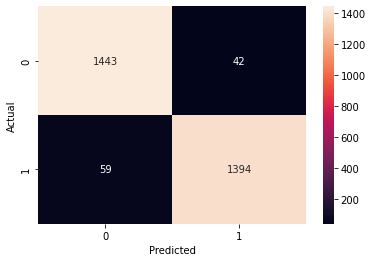

In [60]:
import matplotlib.pyplot as plt

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True,fmt='g')
plt.show()

In [61]:
importance = clf.feature_importances_
indices = np.argsort(importance)[::-1][:5] # get indices of top 5 features
print("Top 5 important features in the decision tree:")
for i in indices:
    print(f"Feature {i}: {importance[i]}")

Top 5 important features in the decision tree:
Feature 5: 0.49099788767015007
Feature 3: 0.2237858235492332
Feature 4: 0.2195844677376499
Feature 9: 0.0023902688332217144
Feature 389: 0.0016230326077921217


In [62]:
from pandas.io.feather_format import read_feather
# Decision tree
importance_scores = clf.feature_importances_
feature_names = list(df_imputed.columns)  # Replace X with your input data

# Get indices of top 5 features
top_indices = np.argsort(importance_scores)[::-1][:5]

# Get top 5 feature names and importance scores
top_feature_names = [feature_names[i] for i in top_indices]
top_importance_scores = [importance_scores[i] for i in top_indices]

# Print results
for i in range(len(top_feature_names)):
    print(f"{i+1}. {top_feature_names[i]}: {top_importance_scores[i]}")

1. HipCircumference: 0.49099788767015007
2. HeightCm: 0.2237858235492332
3. WeightKg: 0.2195844677376499
4. TV1: 0.0023902688332217144
5. DiseaseHxID12_Hypertension: 0.0016230326077921217


In [65]:
# Random forest
importance_scores = rf.feature_importances_
feature_names = list(df_imputed.columns)  # Replace X with your input data

# Get indices of top 5 features
top_indices = np.argsort(importance_scores)[::-1][:5]

# Get top 5 feature names and importance scores
top_feature_names = [feature_names[i] for i in top_indices]
top_importance_scores = [importance_scores[i] for i in top_indices]

# Print results
for i in range(len(top_feature_names)):
    print(f"{i+1}. {top_feature_names[i]}: {top_importance_scores[i]}")


1. HipCircumference: 0.1542395799588853
2. WeightKg: 0.15225701487405807
3. wristcircumference: 0.04037242124493262
4. HeightCm: 0.023591880105467943
5. familypositionid: 0.01950900569955568


In [64]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = rf.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9465622872702518


In [66]:
# Random forest
importance = rf.feature_importances_
indices = np.argsort(importance)[::-1][:5] # get indices of top 5 features
print("Top 5 important features in the random forest:")
for i in indices:
    print(f"Feature {i}: {importance[i]}")

Top 5 important features in the random forest:
Feature 5: 0.1542395799588853
Feature 4: 0.15225701487405807
Feature 15: 0.04037242124493262
Feature 3: 0.023591880105467943
Feature 2: 0.01950900569955568


In [67]:
from sklearn.metrics import confusion_matrix
# Print the classification report
cr = classification_report(y_test, y_pred)
print(f"Classification Report:\n{cr}")
# Predict on the test set

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1485
           1       0.97      0.92      0.94      1453

    accuracy                           0.95      2938
   macro avg       0.95      0.95      0.95      2938
weighted avg       0.95      0.95      0.95      2938

Confusion Matrix:
[[1441   44]
 [ 113 1340]]


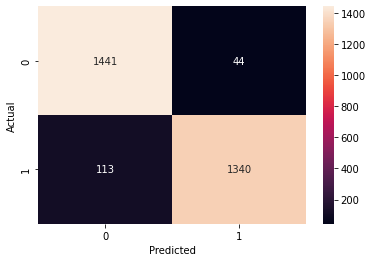

In [68]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True,fmt='g')
plt.show()

In [69]:
from sklearn.svm import SVC

# Create an SVM classifier
svm = SVC(kernel='rbf', random_state=42)

# Fit the SVM classifier to the training set
svm.fit(X_train, y_train)
# Make predictions on the test set
y_pred = svm.predict(X_test)

# Evaluate the SVM classifier on the test set
accuracy = svm.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.950646698434309


In [70]:
from sklearn.metrics import confusion_matrix
# Print the classification report
cr = classification_report(y_test, y_pred)
print(f"Classification Report:\n{cr}")
# Predict on the test set

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1485
           1       0.97      0.93      0.95      1453

    accuracy                           0.95      2938
   macro avg       0.95      0.95      0.95      2938
weighted avg       0.95      0.95      0.95      2938

Confusion Matrix:
[[1438   47]
 [  98 1355]]


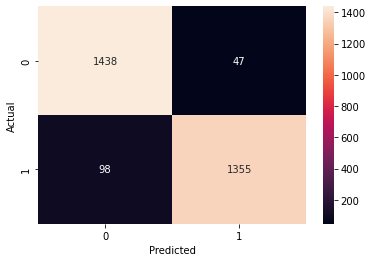

In [71]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True,fmt='g')
plt.show()

In [72]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression classifier
lr = LogisticRegression(random_state=42)

# Fit the logistic regression classifier to the training set
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

# Evaluate the logistic regression classifier on the test set
accuracy = lr.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9809394145677331


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
from sklearn.metrics import confusion_matrix
# Print the classification report
cr = classification_report(y_test, y_pred)
print(f"Classification Report:\n{cr}")
# Predict on the test set

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1485
           1       0.97      0.99      0.98      1453

    accuracy                           0.98      2938
   macro avg       0.98      0.98      0.98      2938
weighted avg       0.98      0.98      0.98      2938

Confusion Matrix:
[[1437   48]
 [   8 1445]]


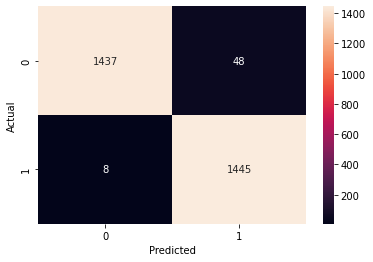

In [74]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True,fmt='g')
plt.show()